In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# read dataset from a Google Drive File
# the file access must have to be Public
file_link = 'https://drive.google.com/file/d/1-cWAGN22-OrZhLLLXiKY1V7XIp88ZOrf/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'

# read csv file in pandas dataframe
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head(10)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN
5,18,1,C,Prunus serotina,0.106,Med,2016,Acer rubrum,1332,Non-Sterile,...,35.29,NaN,0.30,10.80,13.79,7,24.5,1.0,NaN,NaN
6,25,1,A,Quercus alba,0.108,Med,2016,Populus grandidentata,891,Non-Sterile,...,24.00,20.00,5.11,18.82,22.51,7,24.5,0.0,X,NaN
7,40,1,A,Quercus rubra,0.108,Med,2017,Sterile,1595,Sterile,...,4.00,0.00,3.43,25.22,14.81,7,24.5,0.0,X,NaN
8,26,1,A,Quercus rubra,0.108,Med,2016,Acer saccharum,1323,Non-Sterile,...,28.74,36.18,3.83,26.65,14.65,33,115.5,0.0,NaN,X
9,41,1,A,Acer saccharum,0.108,Med,2016,Populus grandidentata,394,Non-Sterile,...,14.16,NaN,-0.05,13.30,12.16,7,24.5,1.0,NaN,NaN


In [ ]:
print("Number of rows and cols:", df.shape)

Number of rows and cols: (2783, 24)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [ ]:
df.describe(include='all')

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
count,2783.000000,2783.000000,2783,2783,2783.000000,2783,2783.000000,2783,2783,2783,...,2783.000000,1283.00000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000,704,491
unique,NaN,NaN,5,4,NaN,3,NaN,7,36,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,NaN,NaN,A,Acer saccharum,NaN,Med,NaN,Sterile,I,Non-Sterile,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X
freq,NaN,NaN,701,751,NaN,1474,NaN,423,90,2360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704,491
mean,3914.513834,9.561624,NaN,NaN,0.085707,NaN,2016.648940,NaN,NaN,NaN,...,20.553069,26.47675,1.933105,15.759792,14.219641,15.282070,53.487244,0.570453,NaN,NaN
std,2253.515063,5.203659,NaN,NaN,0.025638,NaN,0.477387,NaN,NaN,NaN,...,12.309587,16.63689,1.969842,6.779607,4.298271,9.166555,32.082942,0.495100,NaN,NaN
min,3.000000,1.000000,NaN,NaN,0.032000,NaN,2016.000000,NaN,NaN,NaN,...,0.000000,0.00000,-1.350000,2.230000,4.300000,4.000000,14.000000,0.000000,NaN,NaN
25%,1971.000000,5.000000,NaN,NaN,0.066000,NaN,2016.000000,NaN,NaN,NaN,...,13.400000,13.78000,0.170000,10.355000,11.605000,7.000000,24.500000,0.000000,NaN,NaN
50%,3932.000000,10.000000,NaN,NaN,0.082000,NaN,2017.000000,NaN,NaN,NaN,...,18.000000,27.72000,0.750000,14.040000,12.660000,13.000000,45.500000,1.000000,NaN,NaN
75%,5879.000000,14.000000,NaN,NaN,0.100000,NaN,2017.000000,NaN,NaN,NaN,...,24.445000,35.71000,3.780000,21.115000,17.275000,18.000000,63.000000,1.000000,NaN,NaN


In [ ]:
print(df['Adult'].unique())

['I' '970' 'J' '689' '1332' '891' '1595' '1323' '394' '561' '1478' '1320'
 '1454' '921' '984' '118' '1757' '1384' '1688' '961' '1715' '50' '1468'
 '1201' '1386' '277' '415' '285' '275' '1205' '1330' '1297' '1326' 'H'
 '1027' 'G']


In [ ]:
# Check Unique Values
df.nunique()

,0
No,2783
Plot,18
Subplot,5
Species,4
Light_ISF,53
Light_Cat,3
Core,2
Soil,7
Adult,36
Sterile,2


In [ ]:
# Check for missing values
df.isnull().sum()

,0
No,0
Plot,0
Subplot,0
Species,0
Light_ISF,0
Light_Cat,0
Core,0
Soil,0
Adult,0
Sterile,0


In [ ]:
#check the categorical and numerucal column name
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Subplot', 'Species', 'Light_Cat', 'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco', 'PlantDate', 'Harvest', 'Alive']
Numerical Variables:
['No', 'Plot', 'Light_ISF', 'Core', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time', 'Event']


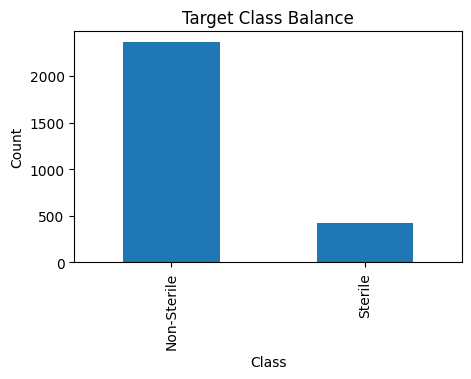


Class distribution:
 Sterile
Non-Sterile    2360
Sterile         423
Name: count, dtype: int64


In [ ]:
# distribution of target
target_counts = df['Sterile'].astype(str).value_counts().sort_index()
plt.figure(figsize=(5,3))
target_counts.plot(kind='bar')
plt.title("Target Class Balance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
print("\nClass distribution:\n", target_counts)

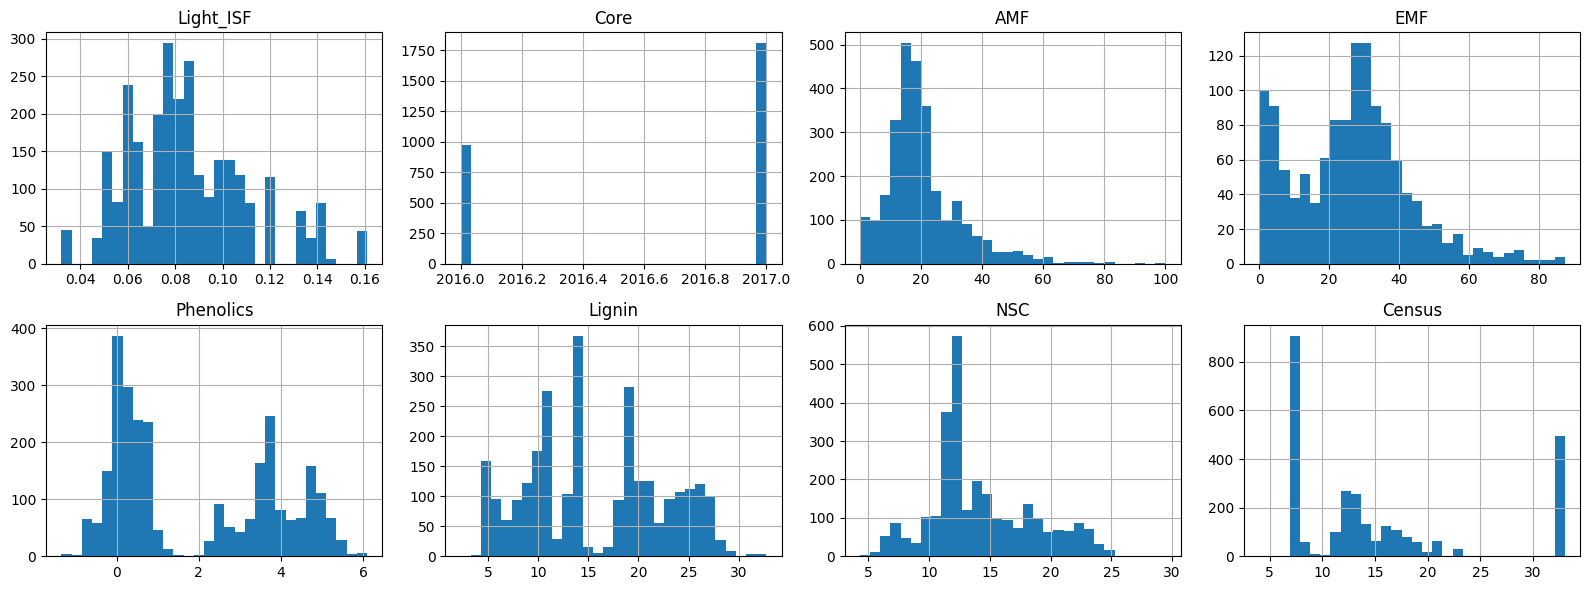

In [ ]:
numeric_features = ['Light_ISF', 'Core', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census',]
cols = 4
rows = (8 + cols - 1)//cols
plt.figure(figsize=(4*cols, 3*rows))
for i, c in enumerate(numeric_features, 1):
    plt.subplot(rows, cols, i)
    df[c].hist(bins=30)
    plt.title(c)
plt.tight_layout()
plt.show()

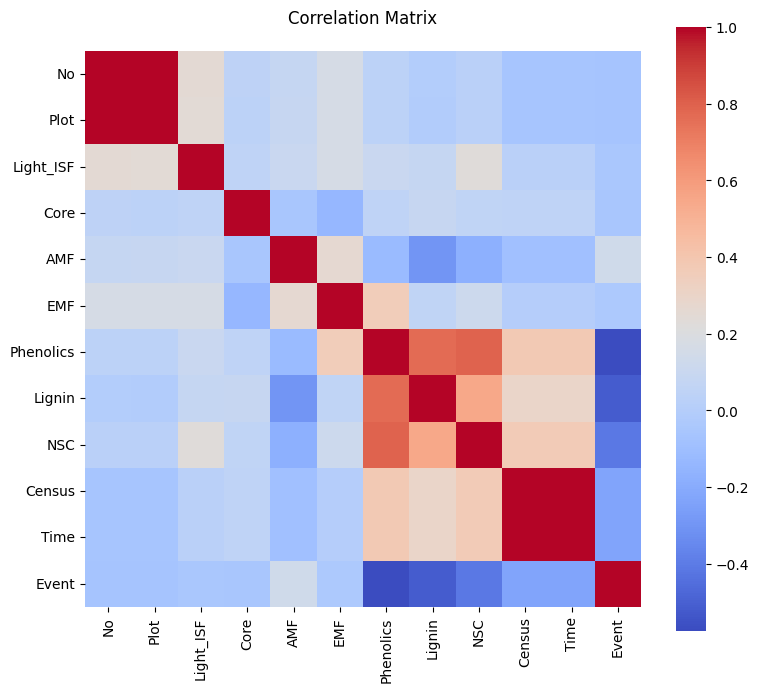

In [ ]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 8))
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix", pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Drop unnecessary features and huge number of missing values
df = df.drop(['No', 'Plot', 'Subplot', 'Event', 'PlantDate', 'Harvest', 'Alive'], axis=1)

In [ ]:
# Handle missing values in the column "EMF" by replacing with the mean value
df['EMF'] = df['EMF'].fillna(df['EMF'].mean())

In [ ]:
# Drop duplicate rows
df = df.drop_duplicates()

In [ ]:
df['Adult_num'] = pd.to_numeric(df['Adult'], errors='coerce')
df['Adult_stage'] = df['Adult'].where(df['Adult'].str.isalpha())

In [ ]:
print(df[['Adult', 'Adult_num', 'Adult_stage']].isnull().sum())

Adult             0
Adult_num       346
Adult_stage    2401
dtype: int64


In [ ]:
df = df.drop(['Adult', 'Adult_stage'], axis=1)
df['Adult_num'] = df['Adult_num'].fillna(df['Adult_num'].mean())

In [ ]:
print("Number of rows and cols:", df.shape)

Number of rows and cols: (2747, 17)


In [ ]:
df.isnull().sum()

,0
Species,0
Light_ISF,0
Light_Cat,0
Core,0
Soil,0
Sterile,0
Conspecific,0
Myco,0
SoilMyco,0
AMF,0


In [ ]:
# Reserving preprocessed dataframe for KMC
df_for_KMC = df

In [ ]:
# Separate target
X = df.drop(columns=['Sterile'])
y = df['Sterile'].map({'Sterile': 1, 'Non-Sterile': 0})

In [ ]:
# Train-test split 70:30

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=42, stratify=y
    )

print("Train shape:", X_train.shape, " | Test shape:", X_test.shape)

Train shape: (1922, 16)  | Test shape: (825, 16)


In [ ]:
# Re-detect column types after dropping
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ],
    remainder="drop"  # drop any columns not specified
)


=== MODEL COMPARISON ===


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,LogisticRegression,1.000000,1.0,1.000000,1.000,1.0
1,DecisionTree,1.000000,1.0,1.000000,1.000,1.0
2,NaiveBayes(Gaussian),1.000000,1.0,1.000000,1.000,1.0
3,KNN,0.997576,1.0,0.984127,0.992,1.0
4,NeuralNet(MLP),0.997576,1.0,0.984127,0.992,1.0


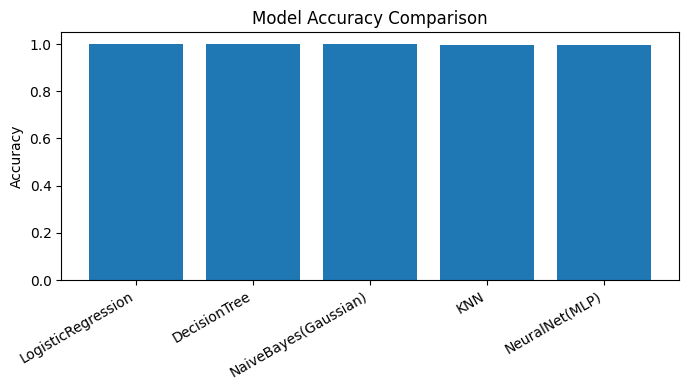


=== Classification Report: LogisticRegression ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       699
           1     1.0000    1.0000    1.0000       126

    accuracy                         1.0000       825
   macro avg     1.0000    1.0000    1.0000       825
weighted avg     1.0000    1.0000    1.0000       825


=== Classification Report: KNN ===
              precision    recall  f1-score   support

           0     0.9971    1.0000    0.9986       699
           1     1.0000    0.9841    0.9920       126

    accuracy                         0.9976       825
   macro avg     0.9986    0.9921    0.9953       825
weighted avg     0.9976    0.9976    0.9976       825


=== Classification Report: DecisionTree ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       699
           1     1.0000    1.0000    1.0000       126

    accuracy                         1.0000       

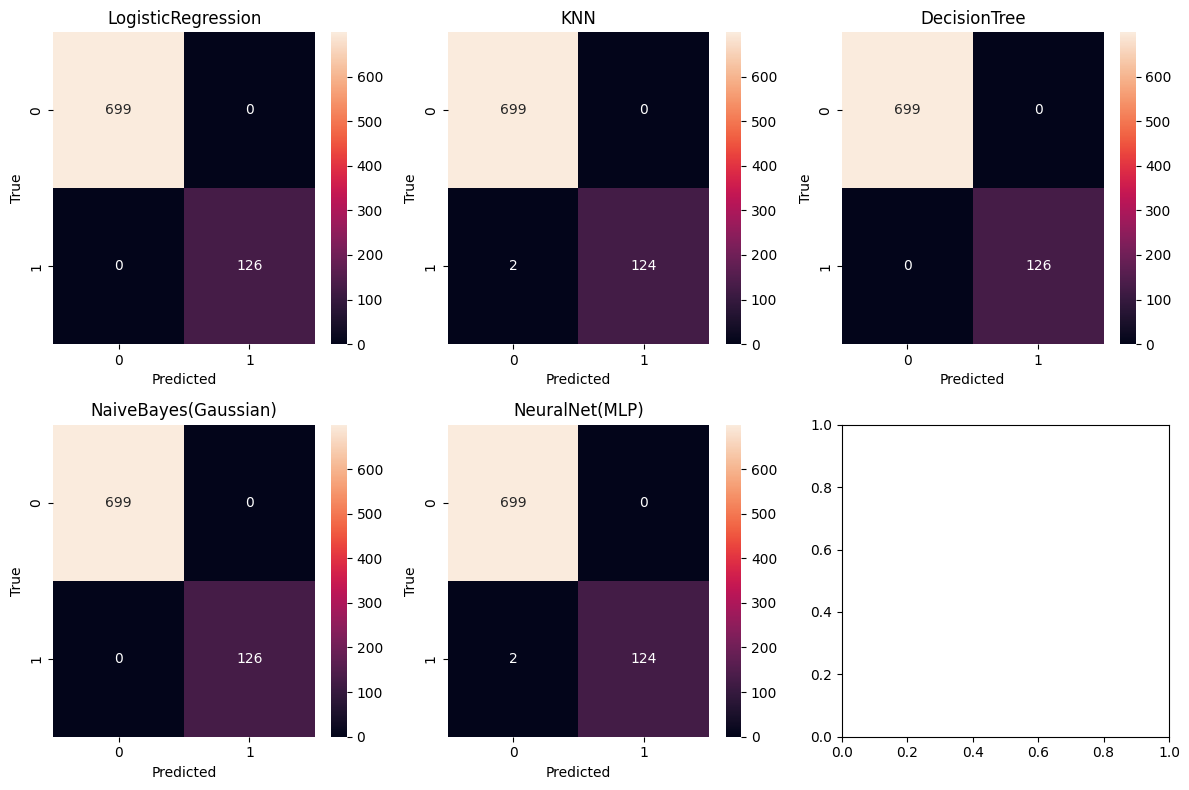

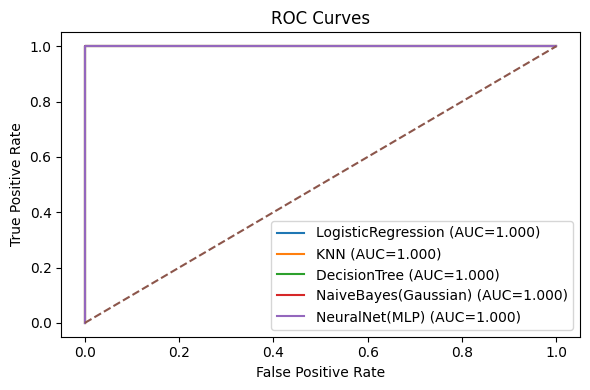

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=11),
    "DecisionTree": DecisionTreeClassifier(max_depth=None, class_weight="balanced", random_state=42),
    "NaiveBayes(Gaussian)": GaussianNB(),
    "NeuralNet(MLP)": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=300,
                                   random_state=42, early_stopping=True)
}

pipelines = {}
results = []
probas = {}
reports = {}
cms = {}

for name, mdl in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocess), ("model", mdl)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]
    probas[name] = y_prob

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, auc])
    pipelines[name] = pipe
    reports[name] = classification_report(y_test, y_pred, digits=4)
    cms[name] = confusion_matrix(y_test, y_pred)

# Results table
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1","ROC_AUC"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print("\n=== MODEL COMPARISON ===")
display(results_df)

# Bar chart of accuracies
plt.figure(figsize=(7,4))
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.xticks(rotation=30, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()

# Print classification reports
for name in models.keys():
    print(f"\n=== Classification Report: {name} ===\n{reports[name]}")

# Confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(12,8))
axes = axes.ravel()
for i, (name, cm) in enumerate(cms.items()):
    sns.heatmap(cm, annot=True, fmt="d", ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("True")
plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(6,4))
for name, y_prob in probas.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df = df_for_KMC

categorical_features.append('Sterile')

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=False)
X = df_encoded.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

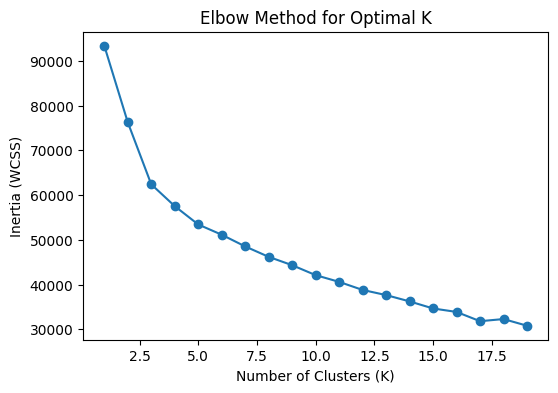

In [ ]:
# Elbow Method to find optimal K

inertia = []
K_range = range(1, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [ ]:
# Choose K from elbow

optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to DataFrame

df["Cluster"] = clusters
print(df.head())

          Species  Light_ISF Light_Cat  Core             Soil      Sterile  \
0  Acer saccharum      0.106       Med  2017  Prunus serotina  Non-Sterile   
1    Quercus alba      0.106       Med  2017    Quercus rubra  Non-Sterile   
2   Quercus rubra      0.106       Med  2017  Prunus serotina  Non-Sterile   
3  Acer saccharum      0.080       Med  2016  Prunus serotina  Non-Sterile   
4  Acer saccharum      0.060       Low  2017  Prunus serotina  Non-Sterile   

      Conspecific Myco SoilMyco    AMF       EMF  Phenolics  Lignin    NSC  \
0  Heterospecific  AMF      AMF  22.00  26.47675      -0.56   13.86  12.15   
1  Heterospecific  EMF      EMF  15.82  31.07000       5.19   20.52  19.29   
2  Heterospecific  EMF      AMF  24.45  28.19000       3.36   24.74  15.01   
3  Heterospecific  AMF      AMF  22.23  26.47675      -0.71   14.29  12.36   
4  Heterospecific  AMF      AMF  21.15  26.47675      -0.58   10.85  11.20   

   Census   Time    Adult_num  Cluster  
0       4   14.0  104

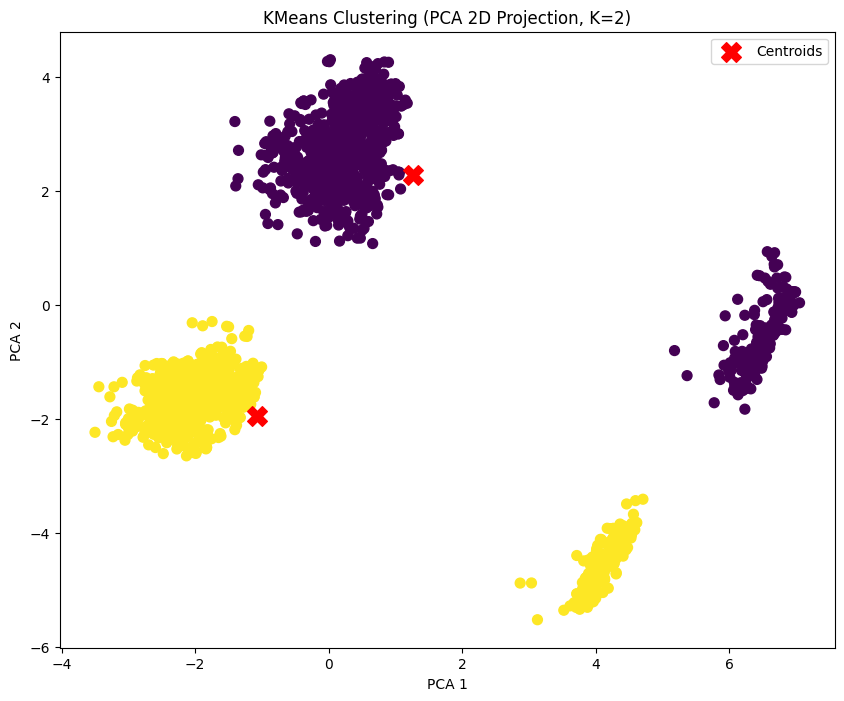

In [ ]:
# PCA for 2D Visualization

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="viridis", s=50)
# Transform cluster centers into PCA space
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:,0], centers_pca[:,1],
            s=200, c="red", marker="X", label="Centroids")
plt.title(f"KMeans Clustering (PCA 2D Projection, K={optimal_k})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()